# Initialisations

In [8]:
library(ggplot2)
library(corrplot)
library(cluster)
library(reshape2)
theme_set(theme_classic())

# Plot Functions

In [9]:
adenome_boxplot <- function(df, feature_index, title){
  x_axis = colnames(df)[feature_index]
  caption = "Source : ADENOME-PROS"

  g <- ggplot(df, aes("", df[,feature_index]))
  g <- g + geom_boxplot(varwidth=T, fill="plum")
  g <- g + labs(title=title, 
         subtitle=x_axis,
         caption=caption,
         x=x_axis,
         y="")
  print(g)
}

adenome_boxplot_couple <- function(df, feature_1, feature_2, f1, f2){
  x_axis = f1
  y_axis = f2
  title = paste(x_axis, " Vs. ", y_axis)
  caption = "Source : ADENOME-PROS"
    
  g <- ggplot(df, aes(x = feature_1, y = feature_2))
  g <- g + geom_boxplot(varwidth=T, fill="plum")
  g <- g + labs(title=title, 
         subtitle="",
         caption=caption,
         x=x_axis,
         y=y_axis)
    
  print(g)
}

adenome_scatterplot <- function(df, feature_1, feature_2, f1, f2) {
  x_axis = f1
  y_axis = f2
  title = paste(x_axis, " Vs. ", y_axis)
  caption = "Source : ADENOME-PROS"
  g <- ggplot(df, aes(x=feature_1, y=feature_2))
  g <- g + geom_point()
  g <- g + labs(title=title,y=y_axis,x=x_axis,caption=caption)
  print(g)
}

adenome_barplot <- function(df, feature_index, title) {
  caption = "Source : ADENOME-PROS"
  x_axis = colnames(df)[feature_index]
  g <- ggplot(df, aes(df[,feature_index]))
  g <- g + geom_bar(width = 0.5)
  g <- g + labs(title=title, 
         subtitle=x_axis,
         caption=caption,
         x=x_axis,
         y="")
  print(g)
}

adenome_piechart <- function(df, feature_index, title){
  bar <- ggplot(vapor, aes(x="", fill = factor(df[,feature_index]))) + geom_bar(width = 1)
  pie <- bar + coord_polar(theta = "y")
  print(pie)
}

# Obtenir le triangle inférieur d'une matrice
get_lower_tri <- function(mat){
    mat[upper.tri(mat)] <- NA
    return(mat)
}

# Obtenir le triangle supérieur d'une matrice
get_upper_tri <- function(mat){
    mat[lower.tri(mat)] <- NA
    return(mat)
}

# Re-ordonne la matrice de corrélation
reorder_cormat <- function(cormat){
    # Utiliser la corrélation entre les variables
    # comme mesure de distance
    dd <- as.dist((1-cormat)/2)
    hc <- hclust(dd)
    cormat <- cormat[hc$order, hc$order]
}

adenome_heatmap <- function(cormat) { 
    # Reordonner la matrice de corrélation
    cormat <- reorder_cormat(cormat)
    upper_tri <- get_upper_tri(cormat)
    # Fondre la matrice de corrélation
    melted_cormat <- melt(upper_tri, na.rm = TRUE)
    # Créer le heatmap
    ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
        geom_tile(color = "white")+
        scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
        midpoint = 0, limit = c(-1,1), space = "Lab",
        name="Pearson\nCorrelation") +
        theme_minimal()+ # minimal theme
        theme(axis.text.x = element_text(angle = 45, vjust = 1, 
        size = 12, hjust = 1))+
        coord_fixed()
    
ggheatmap <- ggheatmap + 
    geom_text(aes(Var2, Var1, label = round(value,3)), color = "black", size = 3) +
    theme(
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      panel.grid.major = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank(),
      axis.ticks = element_blank(),
      legend.justification = c(1, 0),
      legend.position = c(0.6, 0.7),
      legend.direction = "horizontal")+
      guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))
    
    # Afficher heatmap
    print(ggheatmap)
}

# Cleanup & Data Preparation

# Pré-traitements

Les fichiers ont été transformés et nettoyés en CSV avant import dans R
La variable "résidu post mictionnel" comportant des valeurs nulles pour certains individus, nous avons mis des 0 à la place. Ces individus sont des individus qui sont porteurs de sonde et qui n'ont aucun résidu post-mictionnel.

# Préparation des datasets

In [10]:
rtupb<-read.csv(file = "datasets/RTUPB-VBPPS.csv", sep = ",")

# Cast des variables booléennes
rtupb$Comorbidite<-as.logical(rtupb$Comorbidite)
rtupb$Porteur_Sonde<-as.logical(rtupb$Porteur_Sonde)
rtupb$Transfusion<-as.logical(rtupb$Transfusion)
rtupb$Caillotage<-as.logical(rtupb$Caillotage)
rtupb$Reprise_Bloc<-as.logical(rtupb$Reprise_Bloc)

# Cast des variables catégoriques
rtupb$Indication<-as.factor(rtupb$Indication)
rtupb$Anesthesie<-as.factor(rtupb$Anesthesie)
rtupb$Evenement<-as.factor(rtupb$Evenement)
rtupb$Technique<-as.factor(rtupb$Technique)

# Cast des variables catégoriques ordonnées
rtupb$QoL<-as.ordered(rtupb$QoL)
rtupb$X1M_QoL<-as.ordered(rtupb$X1M_QoL)
rtupb$X3M_QoL<-as.ordered(rtupb$X3M_QoL)
rtupb$X6M_QoL<-as.ordered(rtupb$X6M_QoL)
rtupb$X9M_QoL<-as.ordered(rtupb$X9M_QoL)
rtupb$X12M_QoL<-as.ordered(rtupb$X12M_QoL)
rtupb$X15M_QoL<-as.ordered(rtupb$X15M_QoL)
rtupb$X18M_QoL<-as.ordered(rtupb$X18M_QoL)

# 20 premières colonnes du dataset -> pré-opératoire, les dernières -> post-opératoire
rtupb_pre<-rtupb[,1:20]
rtupb_post<-rtupb[,21:41]

# On crée un dataframe ne comportant que les variables numériques (pour corrélation linéaire de Pearson)
rtupb_num <- rtupb[,sapply(rtupb, function(x) is.numeric(x))]
rtupb_num_pre = rtupb_num[1:10]
rtupb_num_post = rtupb_num[11:24]

# On crée un dataframe ne comportant que les données booléennes, ordinales ou catégoriques
rtupb_cat <- rtupb[,sapply(rtupb, function(x) is.ordered(x) | is.factor(x) | is.logical(x))]
rtupb_cat_pre = rtupb_cat[1:10]
rtupb_cat_post = rtupb_cat[11:17]

# 2. Analyse descriptive

## 2.1 Pré-opératoire

### 2.1.1 Distributions

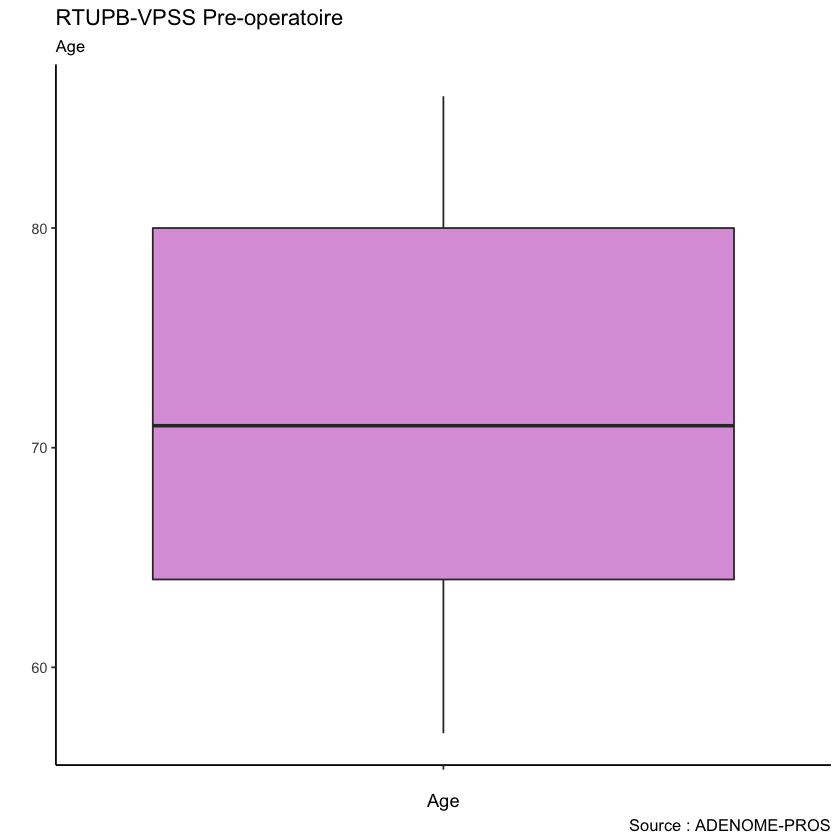

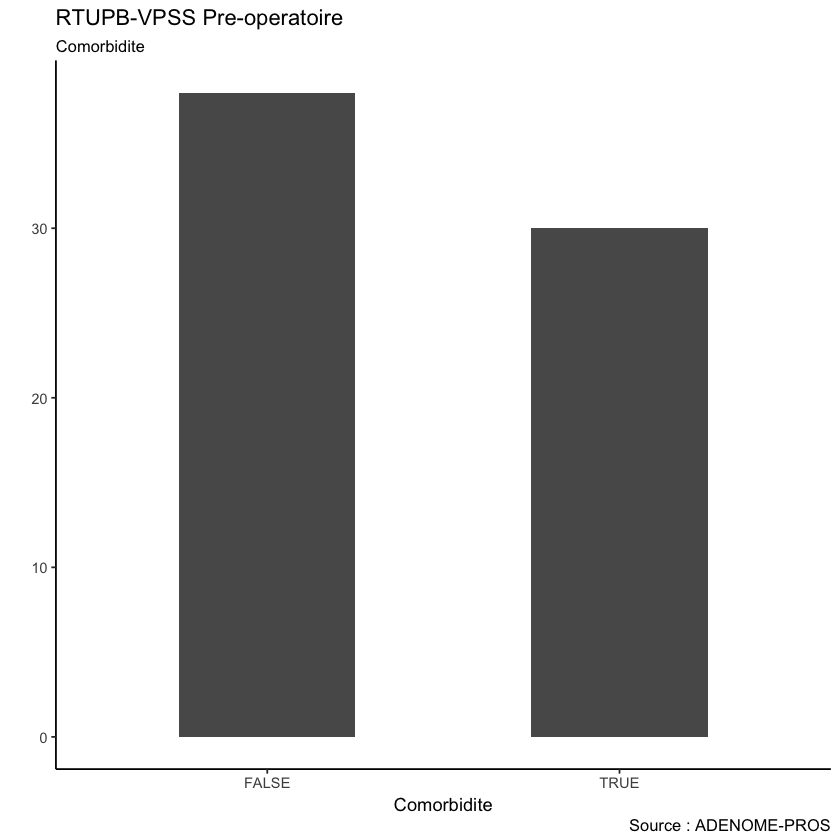

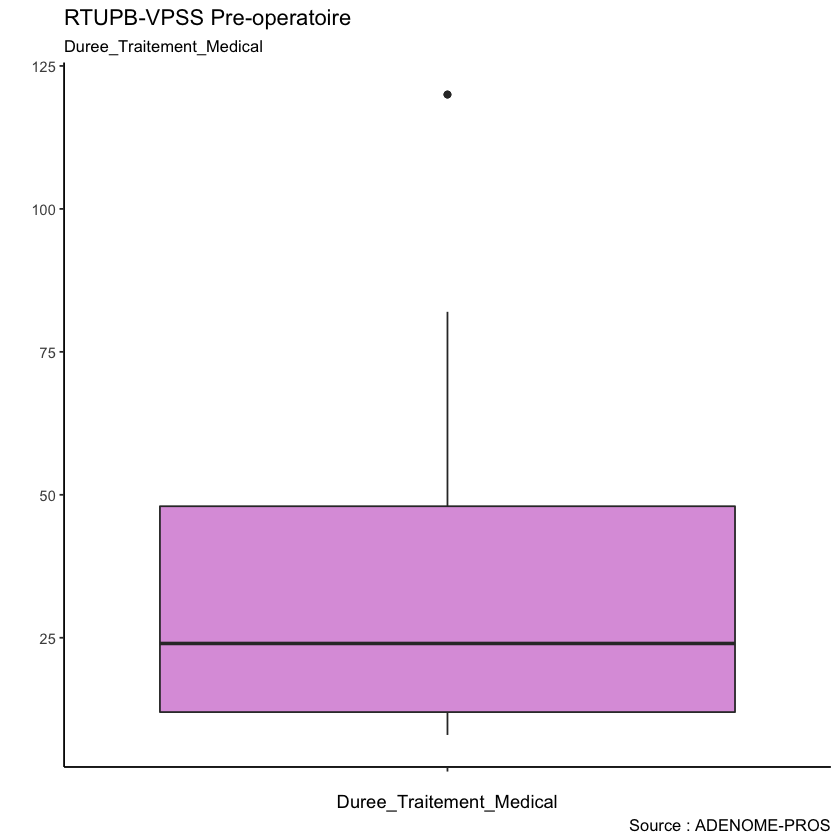

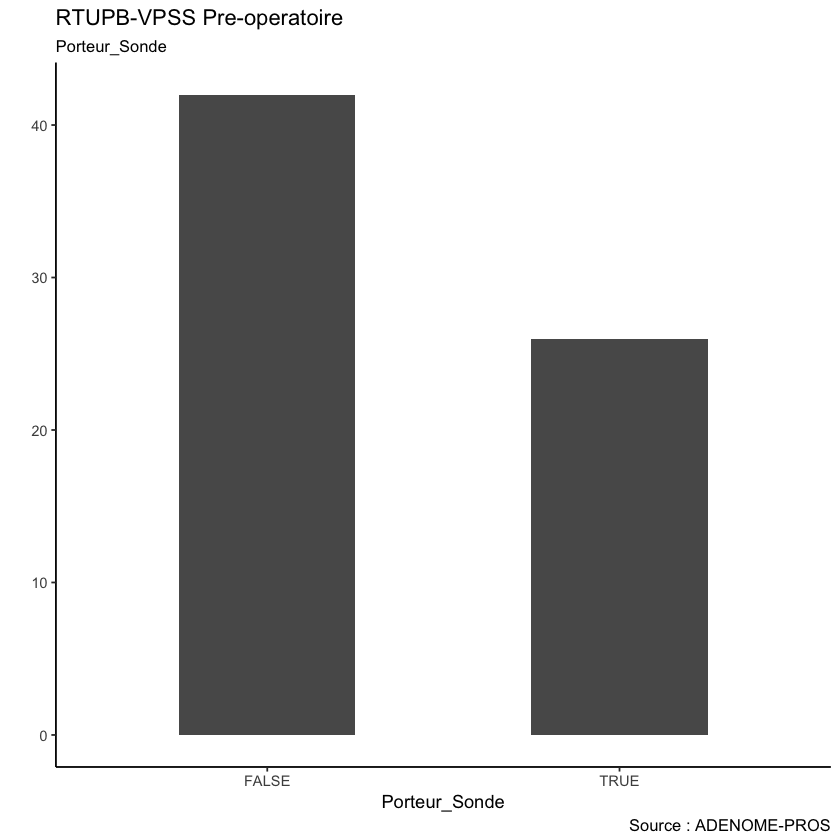

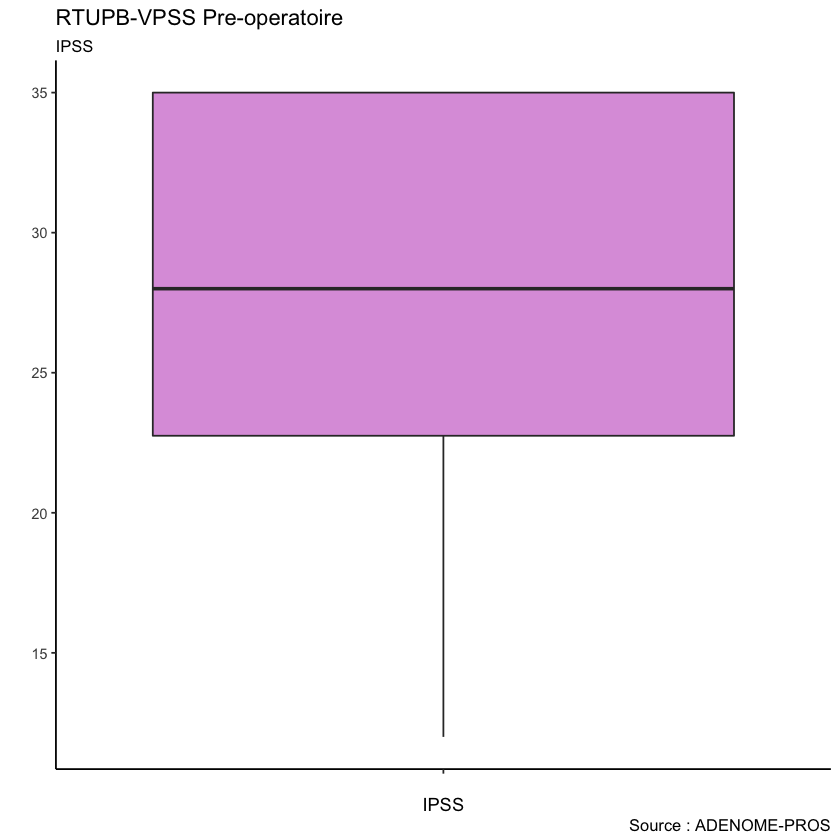

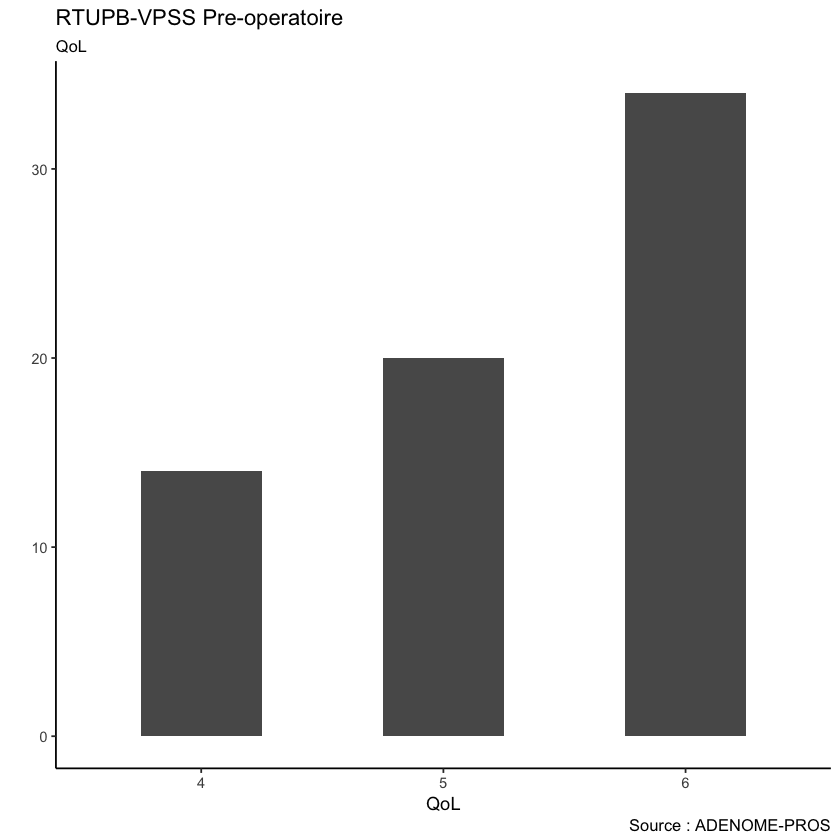

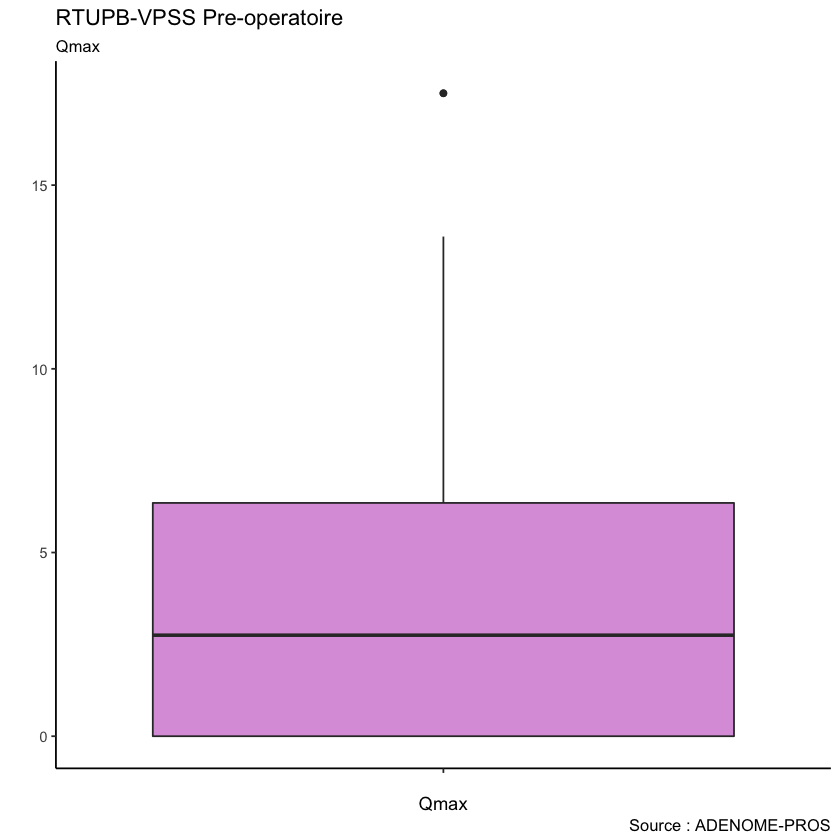

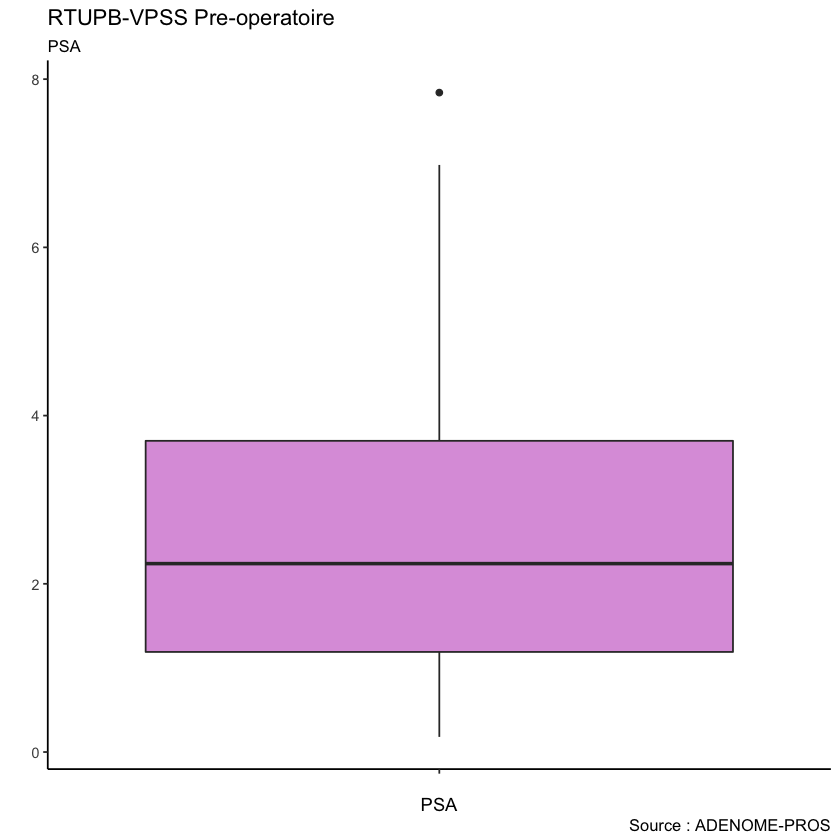

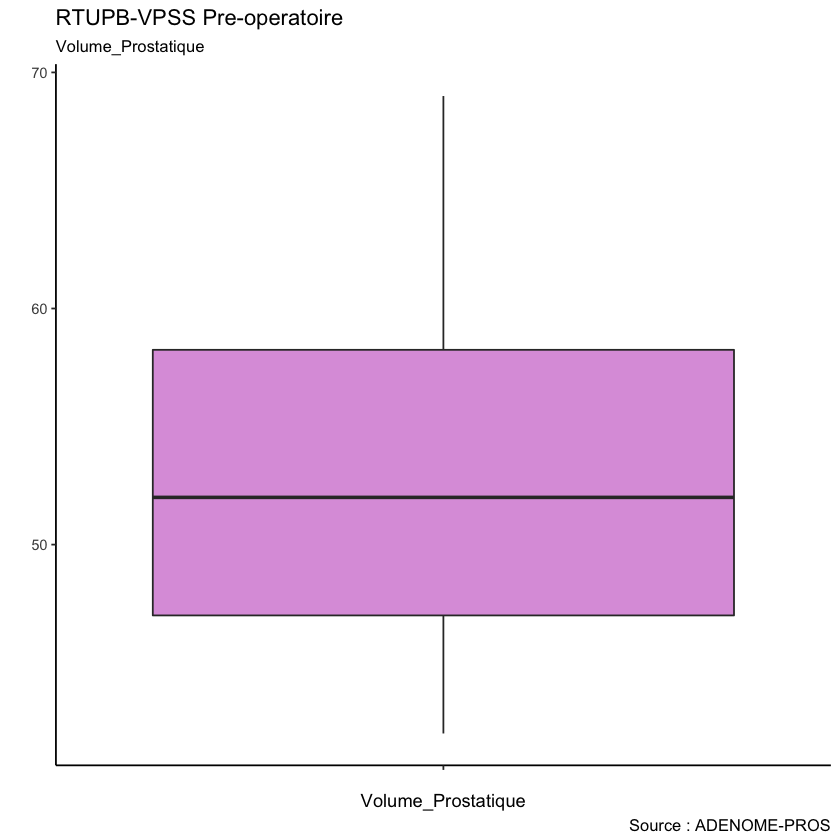

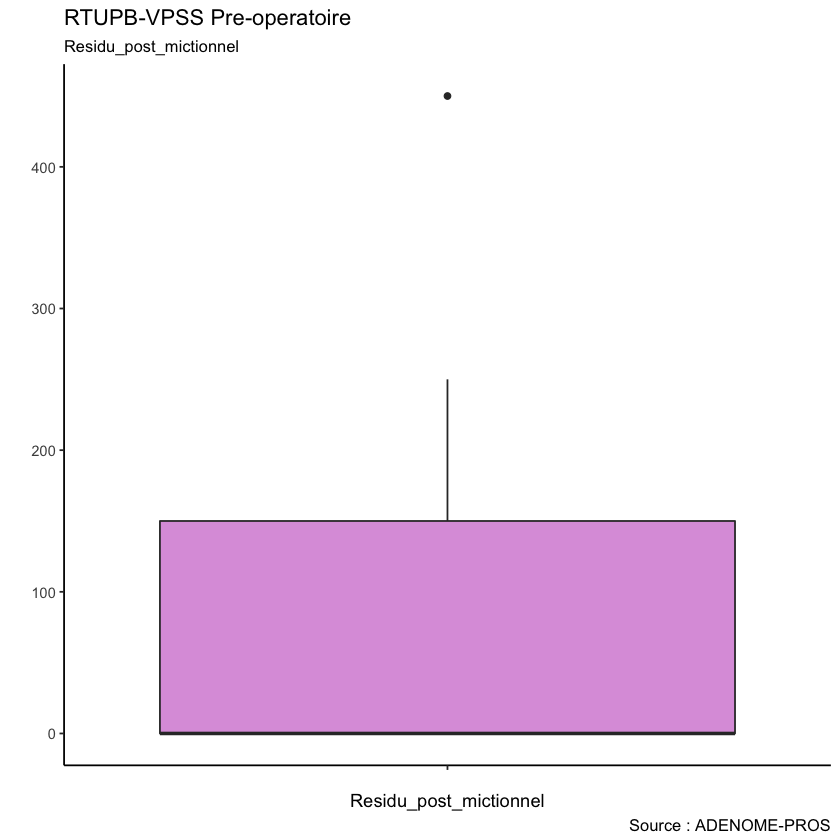

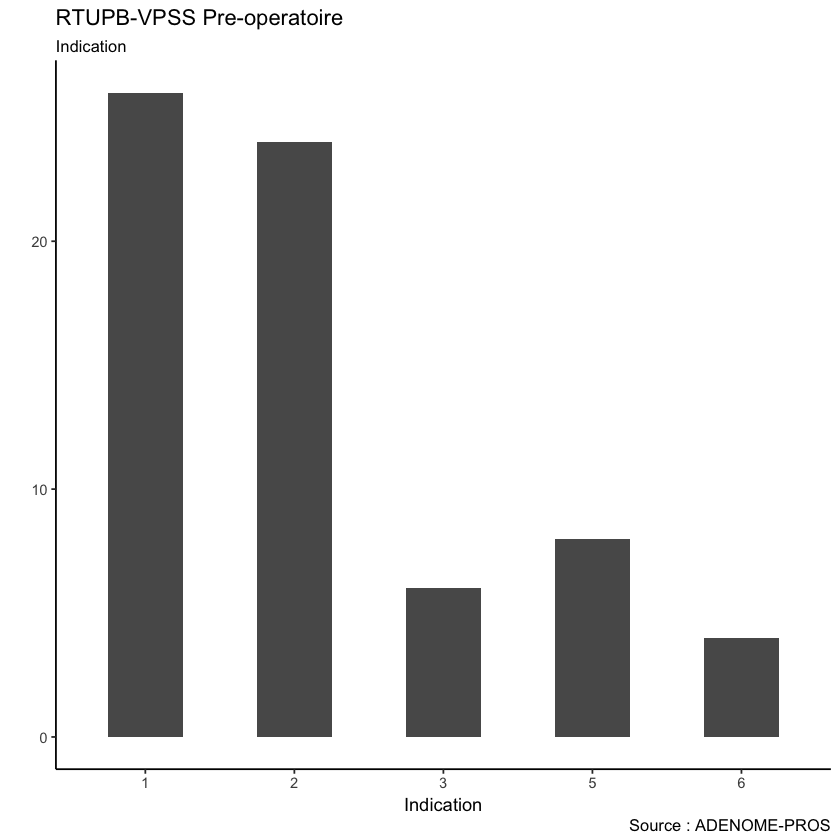

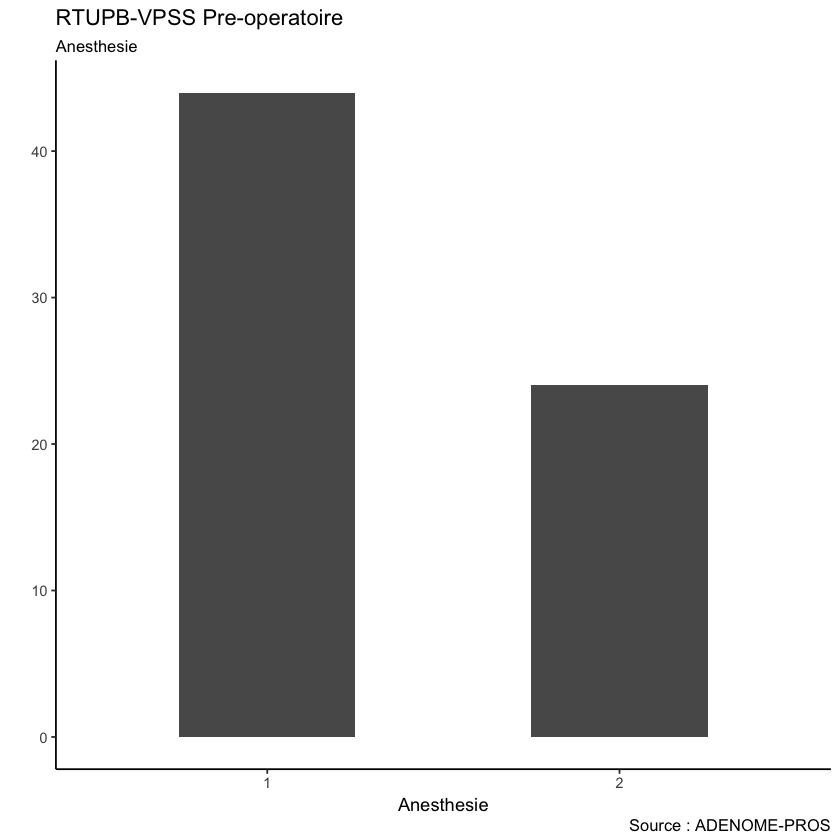

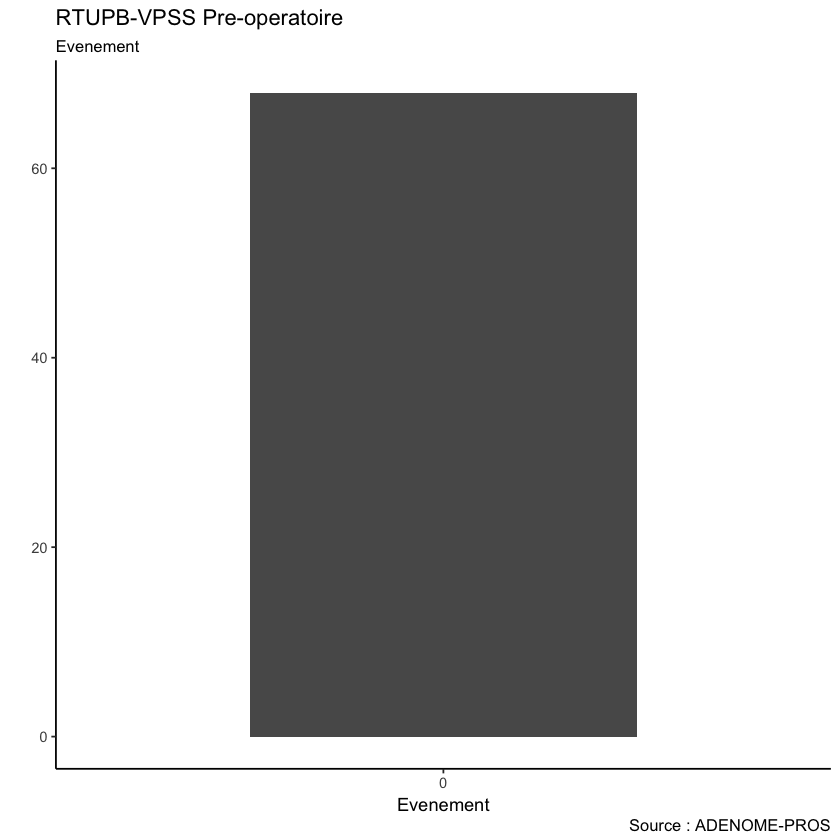

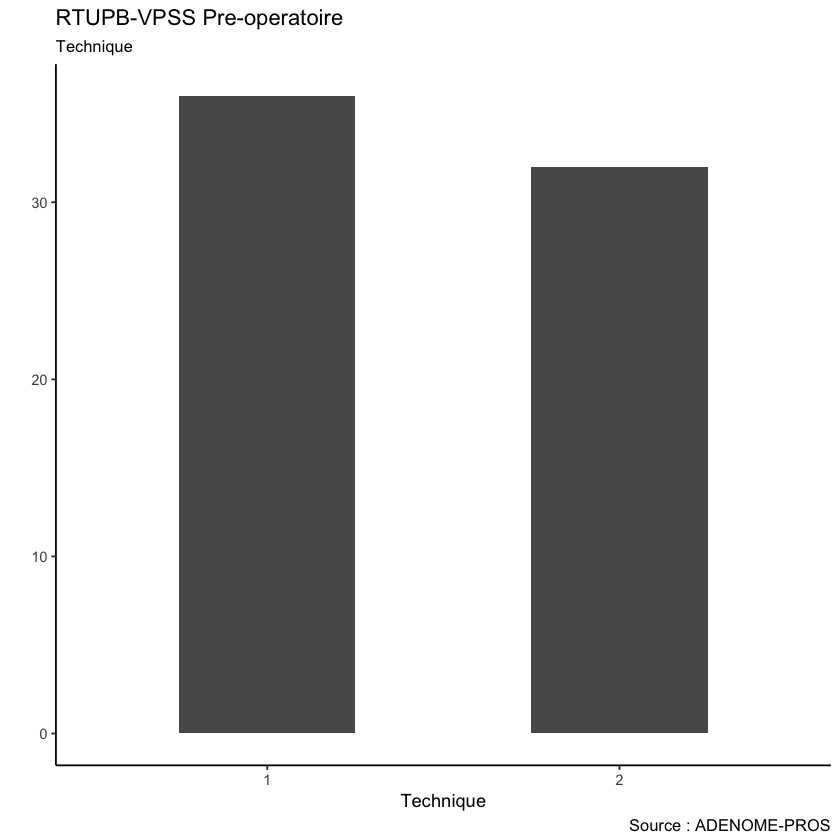

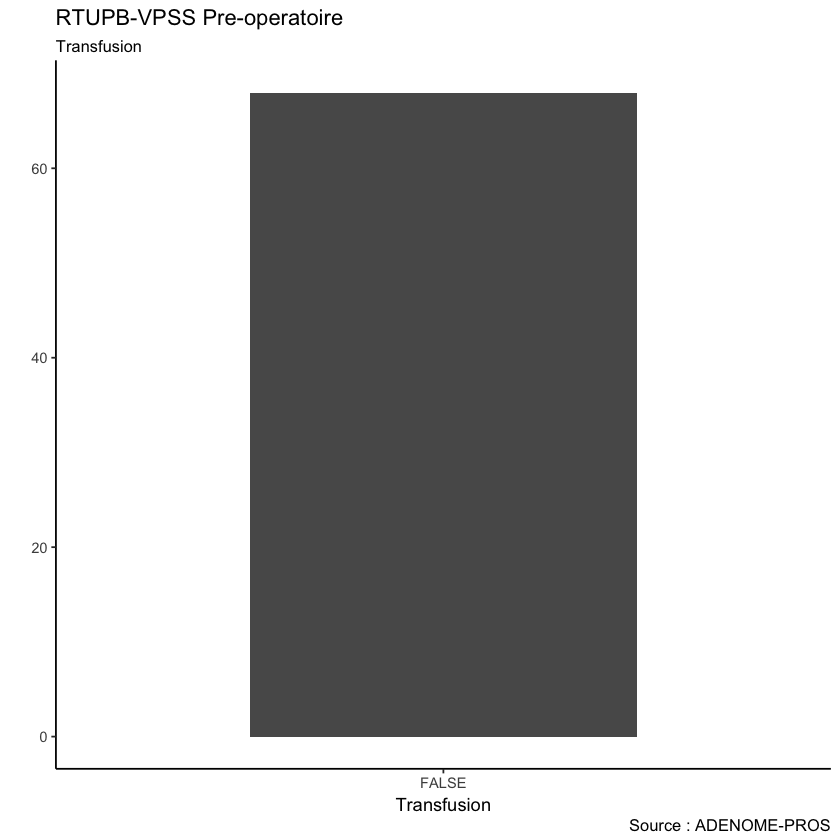

Warning message:
“Removed 32 rows containing non-finite values (stat_boxplot).”

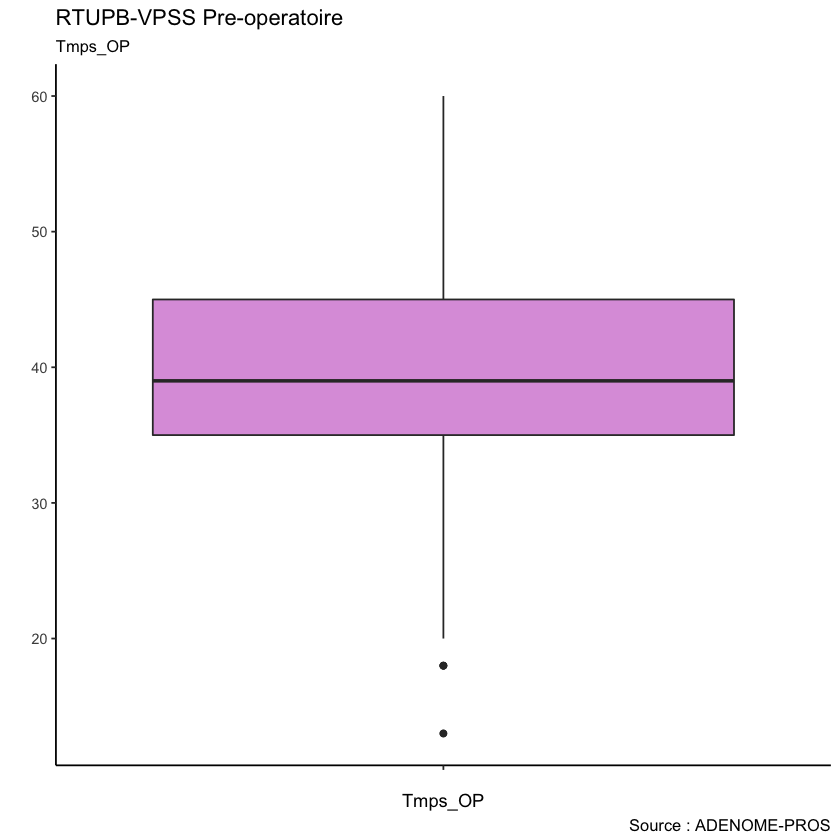

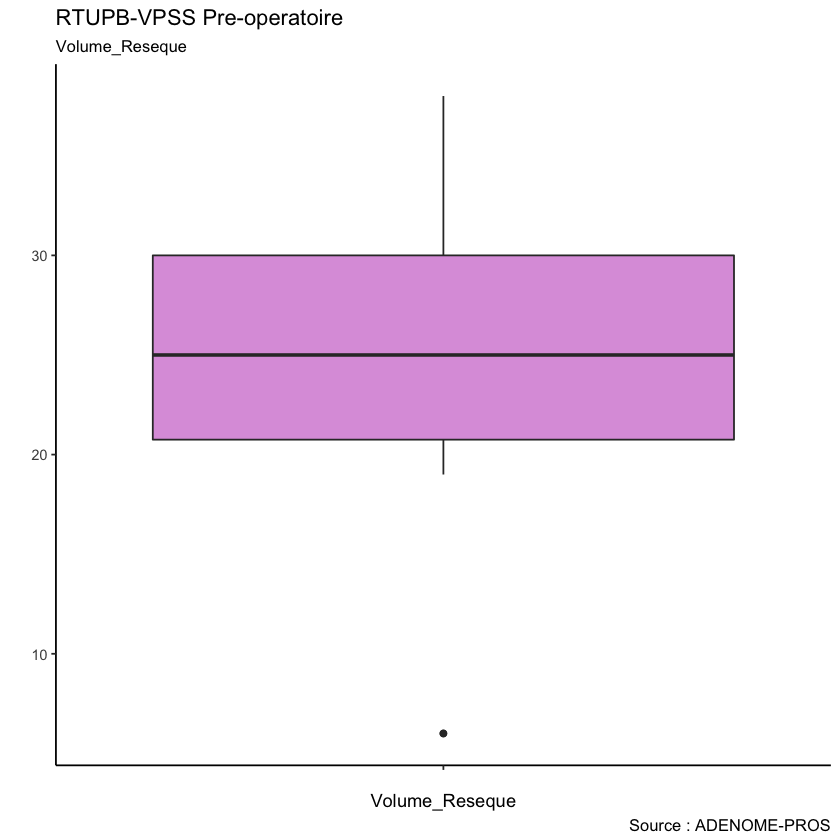

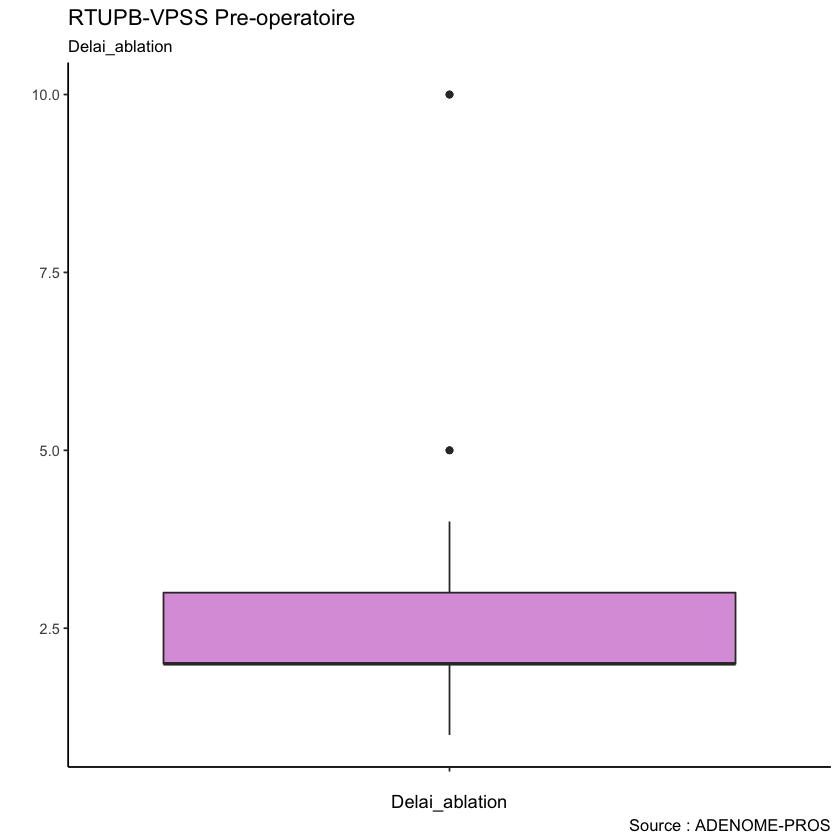

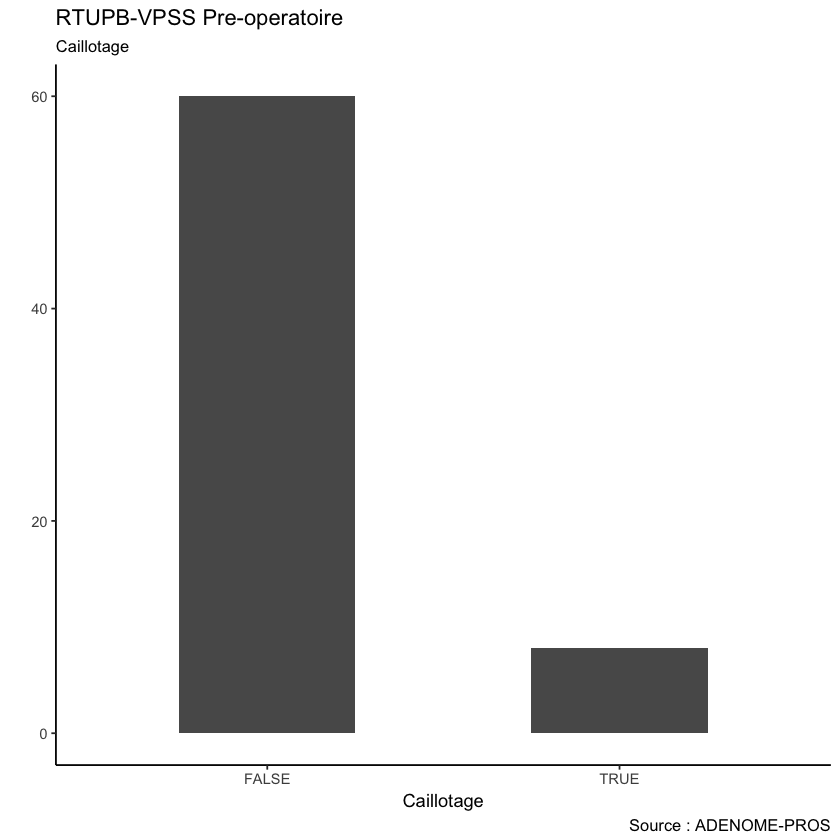

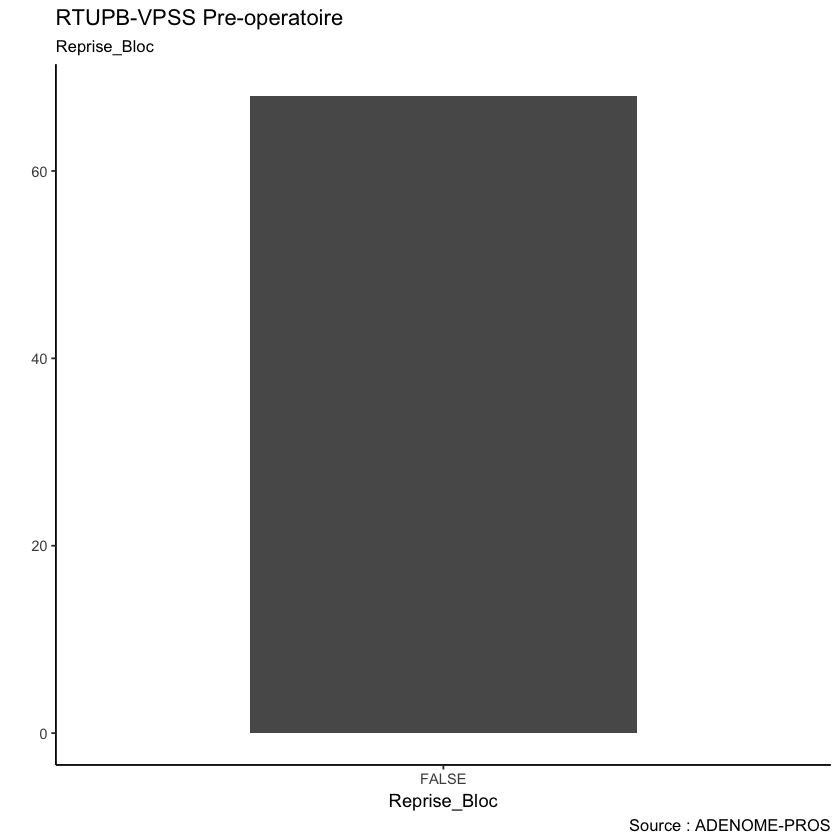

In [11]:
# Boxplots des variables numériques et barplots des variables catégoriques

for (i in 1:ncol(rtupb_pre)) {
  if (is.numeric(rtupb_pre[,i]) || is.integer(rtupb_pre[,i])) {
    adenome_boxplot(rtupb_pre,i,"RTUPB-VPSS Pre-operatoire")
  }
  else
    adenome_barplot(rtupb_pre,i,"RTUPB-VPSS Pre-operatoire")
}

### 2.1.2 Corrélations Pearson sur variables numériques

### 2.1.3 Corrélations Heatmap

In [13]:
mat_cor_rtupb_num_pre = cor(rtupb_num_pre, method = c("pearson"))
mat_cor_rtupb_num_pre
#adenome_heatmap(mat_cor_rtupb_num_pre)

,Age,Duree_Traitement_Medical,IPSS,Qmax,PSA,Volume_Prostatique,Residu_post_mictionnel,Tmps_OP,Volume_Reseque,Delai_ablation
Age,1.00000000,0.06093237,0.55383370,-0.60273390,0.01886474,0.05328983,-0.26139689,-0.09383306,NA,-0.07487066
Duree_Traitement_Medical,0.06093237,1.00000000,0.04694488,-0.01617979,0.14779249,-0.34637459,0.26971648,0.24310105,NA,-0.36517519
IPSS,0.55383370,0.04694488,1.00000000,-0.72028544,-0.06839303,0.14404634,-0.51026776,0.01614090,NA,-0.23280906
Qmax,-0.60273390,-0.01617979,-0.72028544,1.00000000,-0.34421415,-0.25856597,0.42424748,-0.36896801,NA,-0.10425733
PSA,0.01886474,0.14779249,-0.06839303,-0.34421415,1.00000000,0.06975996,0.04275808,0.26159619,NA,0.14576613
Volume_Prostatique,0.05328983,-0.34637459,0.14404634,-0.25856597,0.06975996,1.00000000,-0.16197733,-0.00195139,NA,0.22016844
Residu_post_mictionnel,-0.26139689,0.26971648,-0.51026776,0.42424748,0.04275808,-0.16197733,1.00000000,0.08368691,NA,0.08401926
Tmps_OP,-0.09383306,0.24310105,0.01614090,-0.36896801,0.26159619,-0.00195139,0.08368691,1.00000000,NA,0.17104142
Volume_Reseque,NA,NA,NA,NA,NA,NA,NA,NA,1,NA
Delai_ablation,-0.07487066,-0.36517519,-0.23280906,-0.10425733,0.14576613,0.22016844,0.08401926,0.17104142,NA,1.00000000


Pour les techniques RTUPB-VPSS, en pré-opératoire,, nous notons une correlation entre IPSS et Age. Plus le patient est agé, plus il est gêné. Nous notons également deux corrélations inverses avec Qmax :
Age
IPSS Plus la miction est de bonne qualité, moins le patient est gêné. Plus le patient est agé, moins la miction est de bonne qualité.
Les scatterplots dessous apportent une vue graphique de ces observations.

In [ ]:
adenome_scatterplot(rtupb_pre,rtupb_pre$Age,rtupb_pre$IPSS,"Age","IPSS")
adenome_scatterplot(rtupb_pre,rtupb_pre$Age,rtupb_pre$Qmax,"Age","Qmax")
adenome_scatterplot(rtupb_pre,rtupb_pre$Qmax,rtupb_pre$IPSS,"Qmax","IPSS")

## 2.2 Post-opératoire

### 2.2.1 Distributions

In [ ]:
# Boxplots des variables numériques et barplots des variables catégoriques

for (i in 1:ncol(rtupb_post)) {
  if (is.numeric(rtupb_post[,i]) || is.integer(rtupb_post[,i])) {
    adenome_boxplot(rtupb_post,i,"RTUPB-VPSS Post-operatoire")
  }
  else
    adenome_barplot(rtupb_post,i,"RTUPB-VPSS Post-operatoire")
}

In [ ]:
### .2.2.2 Corrélations entre les variables Post-Opératoire

In [ ]:
plot(rtupb_cat_post)
plot(rtupb_num_post)